## Perform standard imports and load datasets

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'C:\Users\My PC\Desktop\Project\IMD Data\1985-2021\Summary.csv', index_col="Date",parse_dates=True)
df.asfreq = 'D'


C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13/01/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14/01/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/01/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/01/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib

C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/12/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/12/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17/12/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18/12/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib

C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '18/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\My PC\anaconda3\lib

In [2]:
## To omit null and infinity values

df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [3]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [4]:
df.tail()

,SUM,MEAN,MAX
Date,,,
2021-12-27,0.000000,0.000000,0.000000
2021-12-28,0.000000,0.000000,0.000000
2021-12-29,0.000000,0.000000,0.000000
2021-12-30,2.322743,0.004995,1.097212
2021-12-31,94.666595,0.203584,12.417940


In [5]:
df.head()

,SUM,MEAN,MAX
Date,,,
1985-01-01,671.126736,1.443283,31.233431
1985-01-02,0.000000,0.000000,0.000000
1985-01-03,5.434999,0.011688,4.253753
1985-01-04,1019.686118,2.192873,70.918724
1985-01-05,49.689373,0.106859,14.226097


 ## Automate the augmented Dickey-Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['MAX'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.232190e+00
p-value                 1.666806e-15
# lags used             3.500000e+01
# observations          1.346800e+04
critical value (1%)    -3.430836e+00
critical value (5%)    -2.861755e+00
critical value (10%)   -2.566884e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

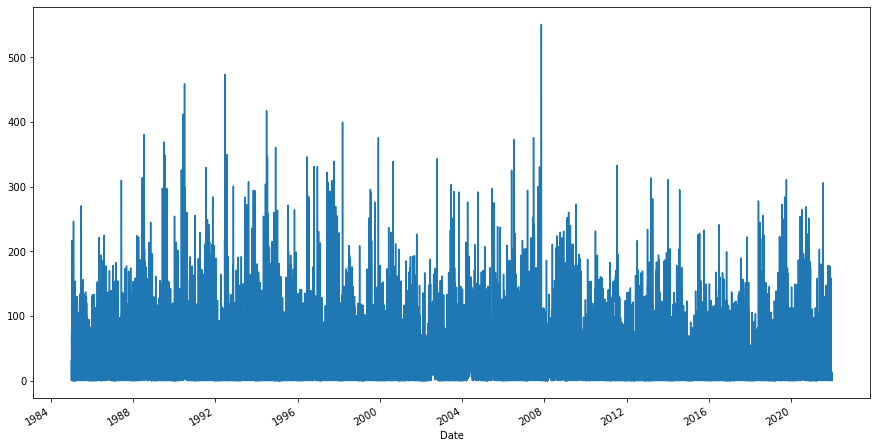

In [8]:
df['MAX'].plot(figsize=(15,8))

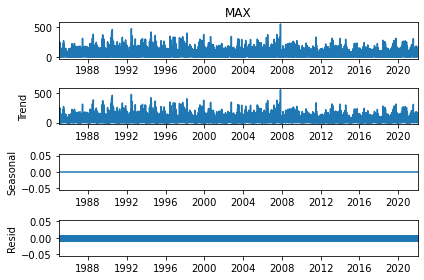

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['MAX'], model='add', period=1)  # model='mul' also works
result.plot();

In [11]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Chosing ARIMA Order

In [12]:
stepwise_fit = auto_arima(df['MAX'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=143470.110, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=142199.469, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=141579.718, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=143468.111, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=140009.026, Time=4.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=139951.547, Time=5.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=141808.406, Time=0.81 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=139952.054, Time=9.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=139952.908, Time=12.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=139956.345, Time=6.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=141633.853, Time=1.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=139955.422, Time=8.69 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=139949.547, Time=2.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=140007.026, Time=1.32 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                13504
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -69970.773
Date:                Sun, 17 Jul 2022   AIC                         139949.547
Time:                        12:17:35   BIC                         139979.590
Sample:                             0   HQIC                        139959.566
                              - 13504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4667      0.006     84.766      0.000       0.456       0.477
ar.L2          0.0681      0.007      9.987      0.000       0.055       0.081
ma.L1         -0.9688      0.002   -473.541      0.000      -0.973      -0.965
sigma2      1855.1809      9.941    186.618      0.000    1835.697    1874.665
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             45544.61
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## FITTING THE DATA INTO ARIMA(2,1,1)

In [13]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima

In [14]:
df.iloc[9123]

SUM     286.545574
MEAN      0.616227
MAX      32.042553
Name: 2009-12-31 00:00:00, dtype: float64

In [15]:
##train = df.loc[:'2009-12-31']
#test = df.loc['2010-1-1':]
train = df.iloc[:9124]
test = df.iloc[9124:]

In [16]:
train.tail()


,SUM,MEAN,MAX
Date,,,
2009-12-27,634.298329,1.364082,55.227371
2009-12-28,858.335861,1.845884,38.320969
2009-12-29,1249.446267,2.686981,72.264877
2009-12-30,2105.672899,4.528329,125.077270
2009-12-31,286.545574,0.616227,32.042553


In [17]:
test.head()

,SUM,MEAN,MAX
Date,,,
2010-01-01,1565.685807,3.367066,40.905869
2010-01-02,0.000000,0.000000,0.000000
2010-01-03,0.000000,0.000000,0.000000
2010-01-04,12.625822,0.027152,1.703416
2010-01-05,2015.518464,4.334448,84.200294


In [32]:
model = ARIMA(train['MAX'],order=(2,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    MAX   No. Observations:                 9124
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -47748.596
Date:                Sun, 17 Jul 2022   AIC                          95505.192
Time:                        12:35:28   BIC                          95533.666
Sample:                             0   HQIC                         95514.874
                               - 9124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4649      0.007     70.277      0.000       0.452       0.478
ar.L2          0.0712      0.008      8.660      0.000       0.055       0.087
ma.L1         -0.9689      0.002   -392.151      0.000      -0.974      -0.964
sigma2      2058.3769     13.174    156.241      0.000    2032.556    2084.198
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33741.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             1.78
Prob(H) (two-sided):                  0.07   Kurtosis:                        11.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARIMA(2,1,1) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'MAX')]

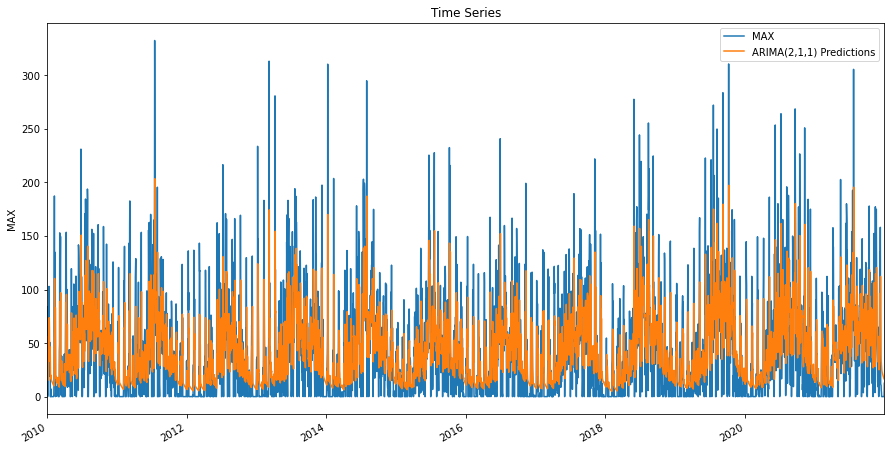

In [40]:
# Plot predictions against known values
title = 'Time Series'
ylabel='MAX'
xlabel='' # we don't really need a label here

ax = test['MAX'].plot(legend=True,figsize=(15,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Evaluate the Model

In [35]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['MAX'], predictions)
print(f'ARIMA(2,1,1) MSE Error: {error:11.10}')

ARIMA(2,1,1) MSE Error: 2266.702712


In [36]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['MAX'], predictions)
print(f'ARIMA(2,1,1) RMSE Error: {error:11.10}')

ARIMA(2,1,1) RMSE Error:  47.6099014


### 9. Retrain the model on the full data and forecast into the future

In [43]:
## FOR NEXT THREE YEARS
model = ARIMA(df['MAX'],order=(2, 1, 1))
results = model.fit()
fcast = results.predict(len(df),len(df)+3,typ='levels').rename('ARIMA(6,0,1) Forecast')

<AxesSubplot:>

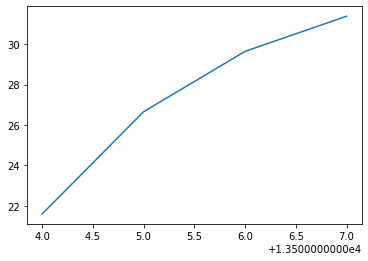

In [44]:
fcast.plot()